## 29/06/21

* Run BLAST on Carmens first round of PCR sequences

In [5]:
import os

In [8]:
os.chdir("/cluster/db/mecoulter/Ross/")

* First make a blast database for Barke (for some reason the rpevious one wouldn't work)

In [10]:
!makeblastdb -in /cluster/db/mecoulter/genomes/genomes/180903_Barke_Unfiltered_chloro_clean_pseudomolecules_v1.fasta -dbtype nucl



Building a new DB, current time: 06/29/2021 15:57:51
New DB name:   /cluster/db/mecoulter/genomes/genomes/180903_Barke_Unfiltered_chloro_clean_pseudomolecules_v1.fasta
New DB title:  /cluster/db/mecoulter/genomes/genomes/180903_Barke_Unfiltered_chloro_clean_pseudomolecules_v1.fasta
Sequence type: Nucleotide
Deleted existing Nucleotide BLAST database named /cluster/db/mecoulter/genomes/genomes/180903_Barke_Unfiltered_chloro_clean_pseudomolecules_v1.fasta
Keep MBits: T
Maximum file size: 1000000000B
Adding sequences from FASTA; added 8 sequences in 47.9902 seconds.


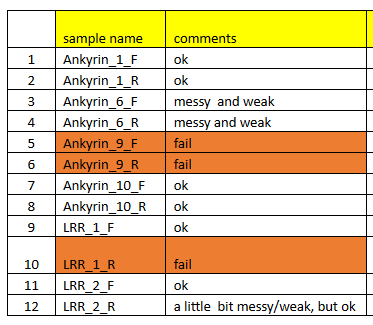

In [65]:
from IPython.display import Image
Image(filename='figures/first_primer_results.png')

* View sequence files in folder

In [66]:
!ls ./results_25-6-21_run18/*.seq

./results_25-6-21_run18/SQ21-166_Ankyrin_10_F_G01_002.seq
./results_25-6-21_run18/SQ21-166_Ankyrin_10_R_H01_001.seq
./results_25-6-21_run18/SQ21-166_Ankyrin_1_F_A01_008.seq
./results_25-6-21_run18/SQ21-166_Ankyrin_1_R_B01_007.seq
./results_25-6-21_run18/SQ21-166_Ankyrin_6_F_C01_006.seq
./results_25-6-21_run18/SQ21-166_Ankyrin_6_R_D01_005.seq
./results_25-6-21_run18/SQ21-166_LRR_1_F_A03_016.seq
./results_25-6-21_run18/SQ21-166_LRR_2_F_C03_014.seq
./results_25-6-21_run18/SQ21-166_LRR_2_R_D03_013.seq


* Now BLAST primer sequence Ankaryn 1F with blastn outformat 10 (csv)

In [14]:
!blastn -query ./results_25-6-21_run18/SQ21-166_Ankyrin_1_F_A01_008.seq -db /cluster/db/mecoulter/genomes/genomes/180903_Barke_Unfiltered_chloro_clean_pseudomolecules_v1.fasta -task blastn-short -outfmt 10 -out ankyrin1F_sequence.csv

In [15]:
import pandas as pd

* Have a look at Ankarin primer 1:

In [55]:
header_outfmt10 = ["name", "chromosome", "percent id", "match_length", "mismatches", "gap_openings", "Query start","Query end", "subject_start", "subject_end", "evalue","bitscore"]

In [32]:
a1 = pd.read_csv("ankyrin1F_sequence.csv", header=None)

In [56]:
a1.columns = header_outfmt10

In [57]:
a1.head()

,name,chromosome,percent id,match_length,mismatches,gap_openings,Query start,Query end,subject_start,subject_end,evalue,bitscore
0,Query_1,chr3H,98.411,755,8,4,12,763,36889397,36890150,0.000000e+00,1376.0
1,Query_1,chr3H,97.468,158,4,0,359,516,608190250,608190093,4.590000e-73,281.0
2,Query_1,chr3H,93.827,162,10,0,360,521,27526567,27526406,3.950000e-61,242.0
3,Query_1,chr3H,93.902,164,9,1,358,520,225505989,225505826,6.170000e-60,238.0
4,Query_1,chr3H,95.238,147,7,0,375,521,586887598,586887744,2.440000e-59,236.0


* You can see the top hit has much greater alignment length/bitscore than others and is in the correct location. So this primer pair works well

## 30/06/21

* Now do the above for all other primer pairs

* So look at primers anakaryn 1R , ankaryn 10F,R, LRR 2F,R

In [43]:
!blastn -query ./results_25-6-21_run18/SQ21-166_Ankyrin_1_R_B01_007.seq -db /cluster/db/mecoulter/genomes/genomes/180903_Barke_Unfiltered_chloro_clean_pseudomolecules_v1.fasta -task blastn-short -outfmt 10 -out ankyrin1R_BLAST.csv

In [58]:
aF = pd.read_csv("ankyrin1R_BLAST.csv", header=None)
aF.columns = header_outfmt10
aF.head()

,name,chromosome,percent id,match_length,mismatches,gap_openings,Query start,Query end,subject_start,subject_end,evalue,bitscore
0,Query_1,chr3H,98.938,753,5,2,14,763,36890109,36889357,0.000000e+00,1419.0
1,Query_1,chr3H,97.468,158,4,0,221,378,608190093,608190250,4.710000e-73,281.0
2,Query_1,chr3H,93.827,162,10,0,216,377,27526406,27526567,4.050000e-61,242.0
3,Query_1,chr3H,93.902,164,9,1,217,379,225505826,225505989,6.330000e-60,238.0
4,Query_1,chr3H,95.238,147,7,0,216,362,586887744,586887598,2.500000e-59,236.0


* Works fine

* Now run above with anakaryn 10

In [48]:
!blastn -query ./results_25-6-21_run18/SQ21-166_Ankyrin_10_F_G01_002.seq -db /cluster/db/mecoulter/genomes/genomes/180903_Barke_Unfiltered_chloro_clean_pseudomolecules_v1.fasta -task blastn-short -outfmt 10 -out ankyrin10F_BLAST.csv

In [59]:
a10F = pd.read_csv("ankyrin10F_BLAST.csv", header=None)
a10F.columns = header_outfmt10
a10F.head()

,name,chromosome,percent id,match_length,mismatches,gap_openings,Query start,Query end,subject_start,subject_end,evalue,bitscore
0,Query_1,chr3H,98.668,751,6,4,15,762,36889397,36890146,0.000000e+00,1382.0
1,Query_1,chr3H,97.468,158,4,0,362,519,608190250,608190093,4.600000e-73,281.0
2,Query_1,chr3H,93.827,162,10,0,363,524,27526567,27526406,3.960000e-61,242.0
3,Query_1,chr3H,93.902,164,9,1,361,523,225505989,225505826,6.180000e-60,238.0
4,Query_1,chr3H,95.238,147,7,0,378,524,586887598,586887744,2.440000e-59,236.0


* Good!

In [49]:
!blastn -query ./results_25-6-21_run18/SQ21-166_Ankyrin_10_R_H01_001.seq -db /cluster/db/mecoulter/genomes/genomes/180903_Barke_Unfiltered_chloro_clean_pseudomolecules_v1.fasta -task blastn-short -outfmt 10 -out ankyrin10R_BLAST.csv

In [60]:
a10R = pd.read_csv("ankyrin10R_BLAST.csv", header=None)
a10R.columns = header_outfmt10
a10R.head()

,name,chromosome,percent id,match_length,mismatches,gap_openings,Query start,Query end,subject_start,subject_end,evalue,bitscore
0,Query_1,chr3H,98.539,753,6,5,13,760,36890109,36889357,0.000000e+00,1376.0
1,Query_1,chr3H,97.468,158,4,0,220,377,608190093,608190250,4.520000e-73,281.0
2,Query_1,chr3H,93.827,162,10,0,215,376,27526406,27526567,3.890000e-61,242.0
3,Query_1,chr3H,93.902,164,9,1,216,378,225505826,225505989,6.080000e-60,238.0
4,Query_1,chr3H,95.238,147,7,0,215,361,586887744,586887598,2.400000e-59,236.0


In [51]:
!blastn -query ./results_25-6-21_run18/SQ21-166_LRR_2_F_C03_014.seq -db /cluster/db/mecoulter/genomes/genomes/180903_Barke_Unfiltered_chloro_clean_pseudomolecules_v1.fasta -task blastn-short -outfmt 10 -out LRR2F_BLAST.csv

In [61]:
L2F = pd.read_csv("LRR2F_BLAST.csv", header=None)
L2F.columns = header_outfmt10
L2F.head()

,name,chromosome,percent id,match_length,mismatches,gap_openings,Query start,Query end,subject_start,subject_end,evalue,bitscore
0,Query_1,chr3H,97.995,798,14,2,16,811,36885547,36886344,0.000000e+00,1451.0
1,Query_1,chr3H,90.566,53,5,0,648,700,192434322,192434270,5.290000e-08,65.9
2,Query_1,chr3H,81.102,127,24,0,138,264,192434795,192434669,8.260000e-07,61.9
3,Query_1,chr3H,91.667,36,3,0,593,628,192434370,192434335,1.200000e-02,48.1
4,Query_1,chr5H,83.546,626,100,1,74,699,584203842,584204464,2.040000e-115,422.0


* Although number 4 has quite a long alignment length, this is just because this sequence has homology elsewhere. The primers have amplified in the right place. Now check the R primer (this one had not such good sequence)

In [53]:
!blastn -query ./results_25-6-21_run18/SQ21-166_LRR_2_R_D03_013.seq -db /cluster/db/mecoulter/genomes/genomes/180903_Barke_Unfiltered_chloro_clean_pseudomolecules_v1.fasta -task blastn-short -outfmt 10 -out LRR2R_BLAST.csv

In [62]:
L2R = pd.read_csv("LRR2R_BLAST.csv", header=None)
L2R.columns = header_outfmt10
L2R.head()

,name,chromosome,percent id,match_length,mismatches,gap_openings,Query start,Query end,subject_start,subject_end,evalue,bitscore
0,Query_1,chr3H,95.636,802,32,3,7,806,36886423,36885623,0.000000e+00,1328.0
1,Query_1,chr3H,90.566,53,5,0,199,251,192434270,192434322,5.190000e-08,65.9
2,Query_1,chr3H,91.667,36,3,0,271,306,192434335,192434370,1.200000e-02,48.1
3,Query_1,chr3H,81.944,72,13,0,634,705,192434669,192434740,7.500000e-01,42.1
4,Query_1,chr5H,81.326,573,103,2,200,771,584204464,584203895,7.870000e-78,297.0


* Now try LRR 1

In [63]:
!blastn -query ./results_25-6-21_run18/SQ21-166_LRR_1_F_A03_016.seq -db /cluster/db/mecoulter/genomes/genomes/180903_Barke_Unfiltered_chloro_clean_pseudomolecules_v1.fasta -task blastn-short -outfmt 10 -out LRR1F_BLAST.csv

In [64]:
L1F = pd.read_csv("LRR1F_BLAST.csv", header=None)
L1F.columns = header_outfmt10
L1F.head()

,name,chromosome,percent id,match_length,mismatches,gap_openings,Query start,Query end,subject_start,subject_end,evalue,bitscore
0,Query_1,chr3H,98.513,807,10,2,24,829,36885559,36886364,0.000000e+00,1501.0
1,Query_1,chr3H,90.566,53,5,0,645,697,192434322,192434270,5.270000e-08,65.9
2,Query_1,chr3H,79.878,164,33,0,98,261,192434832,192434669,2.080000e-07,63.9
3,Query_1,chr3H,91.667,36,3,0,590,625,192434370,192434335,1.200000e-02,48.1
4,Query_1,chr5H,83.614,653,104,1,44,696,584203815,584204464,1.400000e-122,446.0


* So primer sets anakaryn 1R , ankaryn 10F,R, LRR 2F,R, LRR 1 are producing the correct products